# Assignment 1: Wrangling and EDA
### Foundations of Machine Learning

**Q1.** This question provides some practice cleaning variables which have common problems.
1. Numeric variable: For `airbnb_NYC.csv`, clean the `Price` variable as well as you can, and explain the choices you make. How many missing values do you end up with? (Hint: What happens to the formatting when a price goes over 999 dollars, say from 675 to 1,112?) **I removed the commas and converted the string into a int to be able to do quantitiative analysis on this variable. There are no missing values**
2. Categorical variable: For the Minnesota police use of for data, `mn_police_use_of_force.csv`, clean the `subject_injury` variable, handling the NA's; this gives a value `Yes` when a person was injured by police, and `No` when no injury occurred. What proportion of the values are missing? Cross-tabulate your cleaned `subject_injury` variable with the `force_type` variable. Are there any patterns regarding when the data are missing? For the remaining missing values, replace the `np.nan/None` values with the label `Missing`. **76% of entries are missing the "subject_injury" variable and the majority of the missing data is from Bodily force, Chemical Irritant, or Taser, signialing that injuries are most likely underreported for specific types of force.**
3. Dummy variable: For `metabric.csv`, convert the `Overall Survival Status` variable into a dummy/binary variable, taking the value 0 if the patient is deceased and 1 if they are living.
4. Missing values: For `airbnb_NYC.csv`, determine how many missing values of `Review Scores Rating` there are. Create a new variable, in which you impute the median score for non-missing observations to the missing ones. Why might this bias or otherwise negatively impact your results?**This would reduce standard deviation of this since all NA values would be at median, and those values that are missing might be systematically missing, which could skew the data**

In [4]:
import urllib.request
import os
import zipfile
import os

def download_data(force=False):
    """Download and extract course data from Zenodo."""

    zip_path = 'data.zip'
    data_dir = './data'

    if not os.path.exists(zip_path) or force:
        print("Downloading course data...")
        urllib.request.urlretrieve(
            'https://zenodo.org/records/18235955/files/data.zip?download=1',
            zip_path
        )
        print("Download complete")

    if not os.path.exists(data_dir) or force:
        print("Extracting data files...")
        with zipfile.ZipFile(zip_path, 'r') as zip_ref:
            zip_ref.extractall(data_dir)
        print("Data extracted")

    return data_dir


if __name__ == "__main__":
    download_data()

Download complete
Extracting data files...
Data extracted


In [5]:
import pandas as pd

df = pd.read_csv("/content/data/airbnb_NYC.csv", encoding="latin1")


df["Price"] = df["Price"].str.replace(",", "").astype(int)

df["Price"].isna().sum()


np.int64(0)

In [ ]:
df = pd.read_csv("/content/data/mn_police_use_of_force.csv", encoding="latin1")

df["subject_injury"].value_counts(dropna=False)

df["subject_injury"].isna().mean()

In [ ]:
df['subject_injury_cleaned'] = df["subject_injury"].fillna("Missing")

pd.crosstab(
    df["force_type"],
    df["subject_injury_cleaned"]
)



In [16]:
df = pd.read_csv("/content/data/metabric.csv", encoding="latin1")

dummy = {"1:DECEASED": 0, "0:LIVING": 1}

df["overall_survival_dummy"] = df["Overall Survival Status"].map(dummy)

df["overall_survival_dummy"].value_counts(dropna=False)


,count
overall_survival_dummy,
0,768
1,575


In [20]:
df = pd.read_csv("/content/data/airbnb_NYC.csv", encoding="latin1")

df["Review Scores Rating"].isna().sum()

np.int64(8323)

In [22]:
median_score = df["Review Scores Rating"].median()

df["Review Scores Rating_imputed"] = df["Review Scores Rating"].fillna(median_score)
df["Review Scores Rating_imputed"].isna().sum()

np.int64(0)

**Q2.** Go to https://sharkattackfile.net/ and download their dataset on shark attacks.

1. Open the shark attack file using Pandas. It is probably not a csv file, so `read_csv` won't work. What does work? **read_excel**
2. Drop any columns that do not contain data.
3. What is an observation? Carefully justify your answer, and explain how it affects your choices in cleaning and analyzing the data. **Observation is what each row represent, in this case it is a shark attack with the variables in each row describing details of the shark attack. This is imporant to cleaning and analysis since it helps us understand that there hould only be one row per incident and helps us understand reasons behind missing values and how to address those.**
4. Clean the year variable. Describe the range of values you see. Filter the rows to focus on attacks since 1940. Are attacks increasing, decreasing, or remaining constant over time? **There are few in and before the 1700s (typos), and 0 (assuming that is missing) and then significant amount from 1900s and today, seems like attacks are increasing over time**
5. Clean the Age variable and make a histogram of the ages of the victims.
6. Clean the `Type` variable so it only takes three values: Provoked and Unprovoked and Unknown. What proportion of attacks are unprovoked? **Around 73.9% is unprovoked**
7. Clean the `Fatal Y/N` variable so it only takes three values: Y, N, and Unknown.
8. Is the attack more or less likely to be fatal when the attack is provoked or unprovoked? Thoughts?**More likely to be fatal when provoked evem though more total fatal attacks for unprovoked. This is due to significantly more unprovoked attacks, but the proportion is still less.**

In [26]:
import pandas as pd

df = pd.read_excel("/content/GSAF5.xls")

df = df.dropna(axis=1, how="all")

df = df.loc[:, ~df.columns.str.contains("^Unnamed")]

df.columns

Index(['Date', 'Year', 'Type', 'Country', 'State', 'Location', 'Activity',
       'Name', 'Sex', 'Age', 'Injury', 'Fatal Y/N', 'Time', 'Species ',
       'Source', 'pdf', 'href formula', 'href', 'Case Number', 'Case Number.1',
       'original order'],
      dtype='object')

In [35]:
df['Year'].head()

df["Year"] = df["Year"].astype("Int64")

df["Year"].value_counts().sort_index()

,count
Year,
0,129
5,1
77,1
1000,1
1500,1
...,...
2022,98
2023,109
2024,52


In [36]:
df_1940 = df[df["Year"] >= 1940]

df_1940["Year"].value_counts().sort_index()

,count
Year,
1940,24
1941,27
1942,41
1943,28
1944,31
...,...
2022,98
2023,109
2024,52


<Axes: >

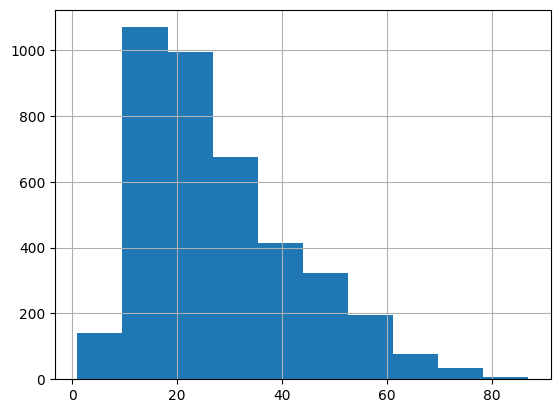

In [45]:
df['Age']

df["Age_clean"] = pd.to_numeric(df["Age"], errors="coerce").astype("Int64")

df["Age_clean"].dropna().hist()

In [51]:
df["Type"].value_counts(dropna=False)

type_map = {
    "Provoked": "Provoked",
    "Unprovoked": "Unprovoked",
    "unprovoked": "Unprovoked"
}

df["Type_clean"] = df["Type"].map(type_map).fillna("Unknown")

df["Type_clean"].value_counts()

(df["Type_clean"] == "Unprovoked").mean()

,count
Type_clean,
Unprovoked,5226
Unknown,1206
Provoked,642


In [53]:
df["Fatal Y/N"].value_counts(dropna=False)

df["Fatal_tmp"] = df["Fatal Y/N"].astype(str).str.strip().str.upper()

fatal_map = {
    "Y": "Y",
    "N": "N"
}

df["Fatal_clean"] = df["Fatal_tmp"].map(fatal_map).fillna("Unknown")

df["Fatal_clean"].value_counts()

,count
Fatal_clean,
N,4942
Y,1489
Unknown,643


**Q3.** Open the "tidy_data.pdf" document available in `https://github.com/ds4e/wrangling`, which is a paper called *Tidy Data* by Hadley Wickham.

  1. Read the abstract. What is this paper about? **The framework and structure of how to tidy data**
  2. Read the introduction. What is the "tidy data standard" intended to accomplish? **Create a consistant structure for data sets and also make the data analysis and cleaning process seamless and easier**
  3. Read the intro to section 2. What does this sentence mean: "Like families, tidy datasets are all alike but every messy dataset is messy in its own way." **Tidy datasets follow same structural rules, while messy datasets can violate these rules in many different ways** What does this sentence mean: "For a given dataset, it’s usually easy to figure out what are observations and what are variables, but it is surprisingly difficult to precisely define variables and observations in general."**For a singluar data set, its easy to know what is a row and column, but across all datasets it can be pretty ambiguous, so whether something should be a variable or value should depend on context and goal**
  4. Read Section 2.2. How does Wickham define values, variables, and observations? **values: individual data points variables: collection of values that measure the same attirbute across units observation: collection of values measured on the same unit**
  5. How is "Tidy Data" defined in section 2.3?**Data that each variables forms a column, each observation forms a row, each type of observational unit forms a table**
  6. Read the intro to Section 3 and Section 3.1. What are the 5 most common problems with messy datasets? Why are the data in Table 4 messy? What is "melting" a dataset?**5 problems: 1. column headers are values, not variable names 2. multiple variables are stored in one column 3. variables are stored in both rows and columns 4. multiple types of observational unit are stored in one table 5. A single observation unit is stored in multiple tables Table 4 is messy because income categories are stored as column headers. Melting is process of converting columns that represent values into rows**
  7. Why, specifically, is table 11 messy but table 12 tidy and "molten"? **Table 11: Variables are spread across both rows and columns and element column stores variable names Table 12: Molten because day values are rows Tidy because each variable has own column, each row represents one day's observation, and each column represents one variable**

**Q4.** This question looks at financial transfers from international actors to American universities. In particular, from which countries and giftors are the gifts coming from, and to which institutions are they going?

For this question, `.groupby([vars]).count()` and `.groupby([vars]).sum()` will be especially useful to tally the number of occurrences and sum the values of those occurrences.

1. Load the `ForeignGifts_edu.csv` dataset.
2. For `Foreign Gift Amount`, create a histogram and describe the variable. Describe your findings. **Distribution is highly right-skewed, meaning most donors are small value, with some high value gifts and there are also a few extremely large gifts**
3. For `Gift Type`, create a histogram or value counts table. What proportion of the gifts are contracts, real estate, and monetary gifts? **Nearly 2/3rds of foreign gifts are contracts, 40% are monetary, and barely any in real estate**
4. What are the top 15 countries in terms of the number of gifts? What are the top 15 countries in terms of the amount given? **See below**
5. What are the top 15 institutions in terms of the total amount of money they receive? Make a histogram of the total amount received by all institutions. **See below**
6. Which giftors provide the most money, in total? **See below**

In [55]:
import pandas as pd

df = pd.read_csv("/content/data/ForeignGifts_edu.csv")
df.head()


,ID,OPEID,Institution Name,City,State,Foreign Gift Received Date,Foreign Gift Amount,Gift Type,Country of Giftor,Giftor Name
0,1,102000,Jacksonville State University,Jacksonville,AL,43738,250000,Monetary Gift,CHINA,NaN
1,2,104700,Troy University,Troy,AL,43592,463657,Contract,CHINA,Confucius Institute Headquarters
2,3,105100,University of Alabama,Tuscaloosa,AL,43466,3649107,Contract,ENGLAND,Springer Nature Customer Service Ce
3,4,105100,University of Alabama,Tuscaloosa,AL,43472,1000,Contract,SAUDI ARABIA,Saudi Arabia Education Mission
4,5,105100,University of Alabama,Tuscaloosa,AL,43479,49476,Contract,SAUDI ARABIA,Saudi Arabia Education Mission


<Axes: >

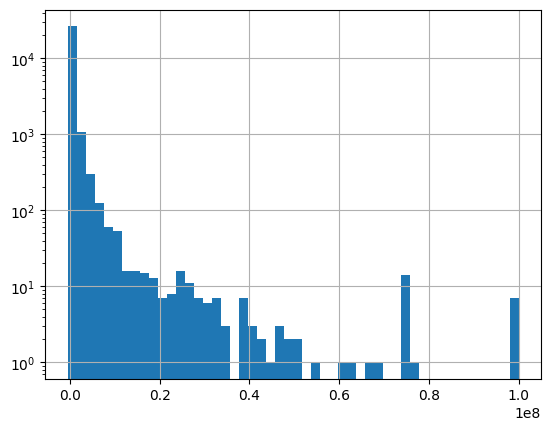

In [58]:
df["Foreign Gift Amount"].dropna().hist(bins=50, log=True)

In [59]:
gift_type_counts = df["Gift Type"].value_counts()
gift_type_counts

,count
Gift Type,
Contract,17274
Monetary Gift,10936
Real Estate,11


In [60]:
gift_type_props = gift_type_counts / gift_type_counts.sum()
gift_type_props

,count
Gift Type,
Contract,0.612097
Monetary Gift,0.387513
Real Estate,0.000390


In [68]:
top15_countries_count = (
    df.groupby("Country of Giftor")
      .count()["Foreign Gift Amount"]
      .sort_values(ascending=False)
      .head(15)
)

top15_countries_count

,Foreign Gift Amount
Country of Giftor,
ENGLAND,3655
CHINA,2461
CANADA,2344
JAPAN,1896
SWITZERLAND,1676
SAUDI ARABIA,1610
FRANCE,1437
GERMANY,1394
HONG KONG,1080


In [63]:
top15_countries_amount = (
    df.groupby("Country of Giftor")
      .sum(numeric_only=True)["Foreign Gift Amount"]
      .sort_values(ascending=False)
      .head(15)
)

top15_countries_amount

,Foreign Gift Amount
Country of Giftor,
QATAR,2706240869
ENGLAND,1464906771
CHINA,1237952112
SAUDI ARABIA,1065205930
BERMUDA,899593972
CANADA,898160656
HONG KONG,887402529
JAPAN,655954776
SWITZERLAND,619899445


In [64]:
top15_institutions = (
    df.groupby("Institution Name")
      .sum(numeric_only=True)["Foreign Gift Amount"]
      .sort_values(ascending=False)
      .head(15)
)

top15_institutions

,Foreign Gift Amount
Institution Name,
Carnegie Mellon University,1477922504
Cornell University,1289937761
Harvard University,954803610
Massachusetts Institute of Technology,859071692
Yale University,613441311
Texas A&M University,521455050
Johns Hopkins University,502409595
Northwestern University,402316221
Georgetown University,379950511


<Axes: >

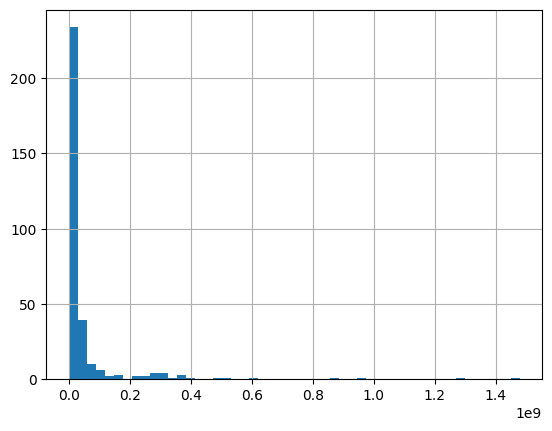

In [65]:
institution_totals = (
    df.groupby("Institution Name")
      .sum(numeric_only=True)["Foreign Gift Amount"]
)

institution_totals.hist(bins=50)


In [69]:
top_giftors = (
    df.groupby("Giftor Name")
      .sum(numeric_only=True)["Foreign Gift Amount"]
      .sort_values(ascending=False)
      .head(15)
)

top_giftors

,Foreign Gift Amount
Giftor Name,
Qatar Foundation,1166503744
Qatar Foundation/Qatar National Res,796197000
Qatar Foundation for Education,373945215
Anonymous,338793629
Saudi Arabian Cultural Mission,275221475
HCL,190000000
Church of Jesus Christ of LDS,185203715
Emirates Institute for Advanced Sc,170641244
QIC,148355497


**Q5.** This question provides some practice doing exploratory data analysis and visualization.

We'll use the `college_completion.csv` dataset from the US Department of Education. The "relevant" variables for this question are:
  - `level` - Level of institution (4-year, 2-year)
  - `aid_value` - The average amount of student aid going to undergraduate recipients
  - `control` - Public, Private not-for-profit, Private for-profit
  - `grad_100_value` - percentage of first-time, full-time, degree-seeking undergraduates who complete a degree or certificate program within 100 percent of expected time (bachelor's-seeking group at 4-year institutions)

1. Load the `college_completion.csv` data with Pandas.
2. How many observations and variables are in the data? **3,798 observations (rows) and 63 variables (columns)** Use `.head()` to examine the first few rows of data.
3. Cross tabulate `control` and `level`. Describe the patterns you see in words. **Public institutions are more evenly split between 2-year and 4-year schools, private not-for-profit institutions are predominantly 4-year, and private for-profit institutions include substantial numbers of both 2-year and 4-year schools.**
4. For `grad_100_value`, create a kernel density plot and describe table. Now condition on `control`, and produce a kernel density plot and describe tables for each type of institutional control. Which type of institution appear to have the most favorable graduation rates? **Private non profit institutions**
5. Make a scatterplot of `grad_100_value` by `aid_value`, and compute the covariance and correlation between the two variables. Describe what you see.**Clear positive relationship bettween student aid and grad rates** Now make the same plot and statistics, but conditioning on `control`. Describe what you see. **Private not for profit instituions show strongest positive relationshhip** which kinds of institutions does aid seem to vary positively with graduation rates?**Private not for profit**

In [70]:
import pandas as pd

df = pd.read_csv("/content/data/college_completion.csv")
df.head()

,index,unitid,chronname,city,state,level,control,basic,hbcu,flagship,...,vsa_grad_after6_transfer,vsa_grad_elsewhere_after6_transfer,vsa_enroll_after6_transfer,vsa_enroll_elsewhere_after6_transfer,similar,state_sector_ct,carnegie_ct,counted_pct,nicknames,cohort_size
0,0,100654,Alabama A&M University,Normal,Alabama,4-year,Public,Masters Colleges and Universities--larger prog...,X,NaN,...,36.4,5.6,17.2,11.1,232937|100724|405997|113607|139533|144005|2285...,13,386,99.7|07,NaN,882.0
1,1,100663,University of Alabama at Birmingham,Birmingham,Alabama,4-year,Public,Research Universities--very high research acti...,NaN,NaN,...,NaN,NaN,NaN,NaN,196060|180461|201885|145600|209542|236939|1268...,13,106,56.0|07,UAB,1376.0
2,2,100690,Amridge University,Montgomery,Alabama,4-year,Private not-for-profit,Baccalaureate Colleges--Arts & Sciences,NaN,NaN,...,NaN,NaN,NaN,NaN,217925|441511|205124|247825|197647|221856|1353...,16,252,100.0|07,NaN,3.0
3,3,100706,University of Alabama at Huntsville,Huntsville,Alabama,4-year,Public,Research Universities--very high research acti...,NaN,NaN,...,0.0,0.0,0.0,0.0,232186|133881|196103|196413|207388|171128|1900...,13,106,43.1|07,UAH,759.0
4,4,100724,Alabama State University,Montgomery,Alabama,4-year,Public,Masters Colleges and Universities--larger prog...,X,NaN,...,NaN,NaN,NaN,NaN,100654|232937|242617|243197|144005|241739|2354...,13,386,88.0|07,ASU,1351.0


In [71]:
df.shape

(3798, 63)

In [72]:
ct = pd.crosstab(df["control"], df["level"])
ct

level,2-year,4-year
control,,
Private for-profit,465,527
Private not-for-profit,68,1180
Public,926,632


In [74]:
df["grad_100_value"] = pd.to_numeric(df["grad_100_value"], errors="coerce")
df["aid_value"] = pd.to_numeric(df["aid_value"], errors="coerce")

df["grad_100_value"].describe()

,grad_100_value
count,3467.000000
mean,28.364465
std,23.312730
min,0.000000
25%,9.000000
50%,22.500000
75%,43.650000
max,100.000000


<Axes: ylabel='Density'>

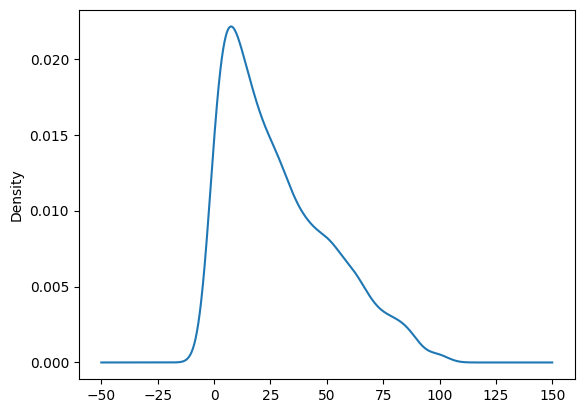

In [75]:
df["grad_100_value"].dropna().plot(kind="kde")


In [76]:
df.groupby("control")["grad_100_value"].describe()

,count,mean,std,min,25%,50%,75%,max
control,,,,,,,,
Private for-profit,779.0,29.108858,25.601687,0.0,6.95,24.7,46.75,100.0
Private not-for-profit,1189.0,41.660976,23.551231,0.0,25.00,41.0,58.30,100.0
Public,1499.0,17.430887,14.729443,0.0,6.90,13.2,23.25,97.8


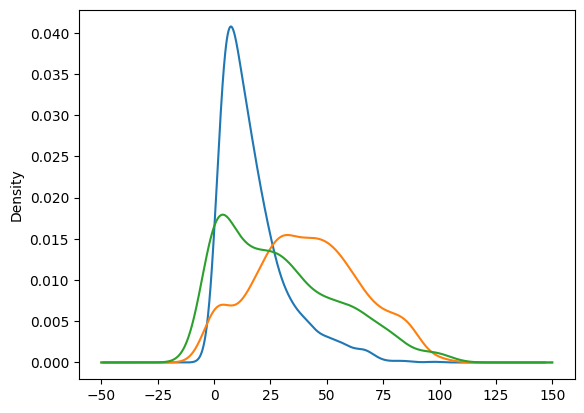

In [77]:
for c in df["control"].dropna().unique():
    df.loc[df["control"] == c, "grad_100_value"].dropna().plot(kind="kde", label=c)

<Axes: xlabel='aid_value', ylabel='grad_100_value'>

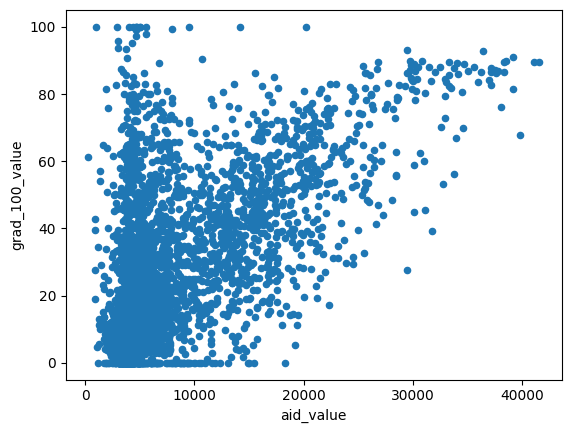

In [78]:
df.plot.scatter(x="aid_value", y="grad_100_value")


In [79]:
sub = df[["aid_value","grad_100_value"]].dropna()
cov_overall = sub["aid_value"].cov(sub["grad_100_value"])
corr_overall = sub["aid_value"].corr(sub["grad_100_value"])
cov_overall, corr_overall

(np.float64(88610.48316902434), np.float64(0.5758792845936073))

**Q6.** In class, we talked about how to compute the sample mean of a variable $X$,
$$
m(X) = \dfrac{1}{N} \sum_{i=1}^N x_i
$$
and sample covariance of two variables $X$ and $Y$,
$$
\text{cov}(X,Y) = \dfrac{1}{N} \sum_{i=1}^N (x_i - m(X))(y_i - m(Y))).
$$
Recall, the sample variance of $X$ is
$$
s^2 = \dfrac{1}{N} \sum_{i=1}^N (x_i - m(X))^2.
$$
It can be very helpful to understand some basic properties of these statistics. If you want to write your calculations on a piece of paper, take a photo, and upload that to your GitHub repo, that's probably easiest.

We're going to look at **linear transformations** of $X$, $Y = a + bX$. So we take each value of $X$, $x_i$, and transform it as $y_i = a + b x_i$.

1. Show that $m(a + bX) = a+b \times m(X)$.
2. Show that $ \text{cov}(X,X) = s^2$.
3. Show that $\text{cov}(X,a+bY) = b \times \text{cov}(X,Y)$
4. Show that $\text{cov}(a+bX,a+bY) = b^2 \text{cov}(X,Y) $. Notice, this also means that $\text{cov}(bX, bX) = b^2 s^2$.
5. Suppose $b>0$ and let the median of $X$ be $\text{med}(X)$. Is it true that the median of $a+bX$ is equal to $a + b \times \text{med}(X)$? Is the IQR of $a + bX$ equal to $a + b \times \text{IQR}(X)$?
6. Show by example that the means of $X^2$ and $\sqrt{X}$ are generally not $(m(X))^2$ and $\sqrt{m(X)}$. So, the results we derived above really depend on the linearity of the transformation $Y = a + bX$, and transformations like $Y = X^2$ or $Y = \sqrt{X}$ will not behave in a similar way.

**Q7.** This question provides some practice doing exploratory data analysis and visualization.

We'll use the `ames_prices.csv` dataset. The "relevant" variables for this question are:
  - `price` - Sale price value of the house
  - `Bldg.Type` - Building type of the house (single family home, end-of-unit townhome, duplex, interior townhome, two-family conversion)

1. Load the `college_completion.csv` data with Pandas.
2. Make a kernel density plot of price and compute a describe table. Now, make a kernel density plot of price conditional on building type, and use `.groupby()` to make a describe type for each type of building. Which building types are the most expensive, on average? Which have the highest variance in transaction prices?
3. Make an ECDF plot of price, and compute the sample minimum, .25 quantile, median, .75 quantile, and sample maximum (i.e. a 5-number summary).
4. Make a boxplot of price. Are there outliers? Make a boxplot of price conditional on building type. What patterns do you see?
5. Make a dummy variable indicating that an observation is an outlier.
6. Winsorize the price variable, and compute a new kernel density plot and describe table. How do the results change?